In [11]:
import numpy as np 
import pandas as pd

In [12]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers,callbacks
from keras.utils import to_categorical
import numpy as np
import pandas as pd
train_data=pd.read_csv("train.csv")


X_train, X_val = train_test_split(train_data, test_size=0.2, random_state=18)

In [13]:

X=X_train.drop("emotions",axis=1)
Y=X_train["emotions"]
X_valid=X_val.drop("emotions",axis=1)
Y_valid=X_val["emotions"]

In [24]:
model=keras.Sequential([
    layers.Reshape((48, 48, 1), input_shape=(2304,)),
    layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(7,activation='linear'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
model.summary()


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 48, 48, 1)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 20)        520       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 22, 22, 20)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 9680)              0         
                                                                 
 dense_7 (Dense)             (None, 7)                 67767     
                                                                 
Total params: 68287 (266.75 KB)
Trainable params: 68287 (266.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________

Epoch 1/50
718/718 [==============================] - 9s 11ms/step - loss: 3.6228 - accuracy: 0.2289 - val_loss: 1.8451 - val_accuracy: 0.2635
Epoch 2/50
718/718 [==============================] - 7s 9ms/step - loss: 1.7570 - accuracy: 0.2938 - val_loss: 1.8334 - val_accuracy: 0.2832
Epoch 3/50
718/718 [==============================] - 7s 9ms/step - loss: 1.6588 - accuracy: 0.3336 - val_loss: 1.8498 - val_accuracy: 0.2868
Epoch 4/50
718/718 [==============================] - 7s 10ms/step - loss: 1.5923 - accuracy: 0.3637 - val_loss: 1.9277 - val_accuracy: 0.2938
Epoch 5/50
718/718 [==============================] - 7s 10ms/step - loss: 1.5164 - accuracy: 0.3968 - val_loss: 2.0217 - val_accuracy: 0.2975
Epoch 6/50
718/718 [==============================] - 7s 9ms/step - loss: 1.4594 - accuracy: 0.4209 - val_loss: 2.0974 - val_accuracy: 0.2933
Epoch 7/50
718/718 [==============================] - 7s 9ms/step - loss: 1.4267 - accuracy: 0.4392 - val_loss: 2.2626 - val_accuracy: 0.3093
Epo

<Axes: >

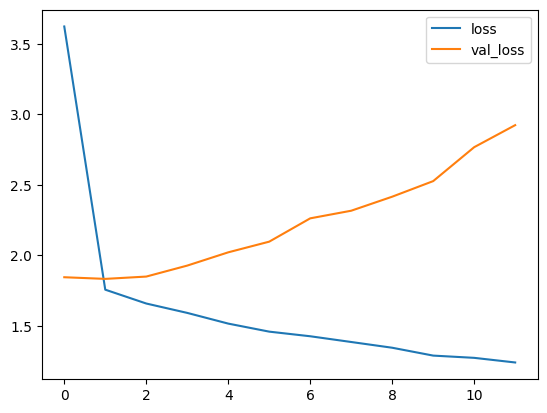

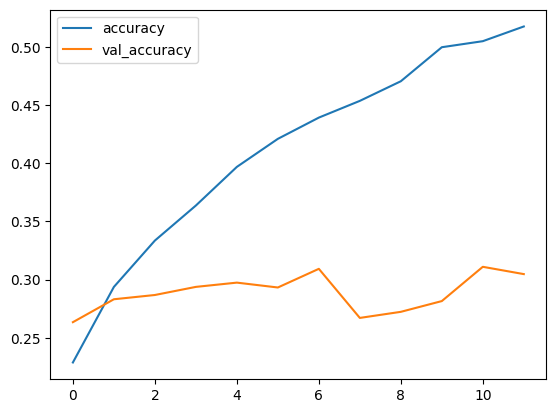

In [25]:
history = model.fit(X, Y, validation_data=(X_valid, Y_valid), epochs=50,callbacks=[early_stopping])
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()